In [158]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
netflix = pd.read_csv("netflix_cleaned.csv")
netflix.head(2)

,Unnamed: 0,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,listed_in_1,listed_in_2,listed_in_3
0,0,Movie,Dick Johnson Is Dead,Kirsten Johnson,['Data not available'],United States,2021-09-25,2020,PG-13,90 min,['Documentaries'],"As her father nears the end of his life, filmm...",9,September,2021,Documentaries,0,0
1,1,TV Show,Blood & Water,Data not available,"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"['International TV Shows', 'TV Dramas', 'TV My...","After crossing paths at a party, a Cape Town t...",9,September,2021,International TV Shows,TV Dramas,TV Mysteries


# NETFLIX CONTENTS INFO

In [160]:
netflix_contents_info = netflix[['title', 'type']]
netflix_contents_info.head(3)

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show


In [161]:
n_movies = int(netflix_contents_info['type'].value_counts()['Movie'])
n_tvs = int(netflix_contents_info['type'].value_counts()['TV Show'])

In [162]:
col_names = ['name', 'movies', 'tvs']
netflix_info = pd.DataFrame([['Movies/TVs', n_movies, n_tvs]], columns=col_names)
netflix_info.to_csv('../Dashboard/Components/data/netflix_content_info.csv', index=False)

# NETFLIX RELEASE YEAR

In [163]:
netflix_release_year = netflix[['title', 'release_year']]
netflix_release_year.head(3)

,title,release_year
0,Dick Johnson Is Dead,2020
1,Blood & Water,2021
2,Ganglands,2021


In [164]:
netflix_year = netflix_release_year['release_year'].value_counts().reset_index()
netflix_year.rename(columns = {'index':'year'}, inplace = True)
netflix_year.rename(columns = {'release_year':'count'}, inplace = True)
netflix_year = netflix_year[netflix_year['count']>69]
netflix_year['count'] = netflix_year['count'].astype(int)

In [165]:
netflix_year.to_csv('../Dashboard/Components/data/netflix_year_info.csv', index=False, header=True)

# NETFLIX RATINGS

In [166]:
netflix_ratings = netflix[['title', 'rating']]
netflix_ratings.head(3)

,title,rating
0,Dick Johnson Is Dead,PG-13
1,Blood & Water,TV-MA
2,Ganglands,TV-MA


In [167]:
netflix_ratings = netflix_ratings['rating'].value_counts().reset_index()
netflix_ratings

,index,rating
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [168]:
netflix_ratings.rename(columns = {'rating':'count'}, inplace = True)
netflix_ratings.rename(columns = {'index':'rating'}, inplace = True)

In [169]:
netflix_ratings = netflix_ratings[netflix_ratings['count']>40]

In [170]:
netflix_ratings.to_csv('../Dashboard/Components/data/netflix_ratings_info.csv', index=False, header=True)

# NETFLIX COUNTRY COUNTER

In [171]:
netflix_countries = netflix[['title', 'country']]
netflix_countries.head(3)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States


In [172]:
netflix_countries['first_country'] = netflix_countries['country'].apply(lambda x: x.split(",")[0])
netflix_countries['first_country'].replace('United States', 'USA', inplace=True)
netflix_countries['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_countries['first_country'].replace('South Korea', 'S. Korea',inplace=True)

netflix_countries = netflix_countries['first_country'].value_counts().reset_index()
netflix_countries = netflix_countries[netflix_countries['first_country']>110]

C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2036702356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_countries['first_country'] = netflix_countries['country'].apply(lambda x: x.split(",")[0])
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2036702356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_countries['first_country'].replace('United States', 'USA', inplace=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2036702356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [173]:
netflix_countries.rename(columns = {'first_country':'count'}, inplace = True)
netflix_countries.rename(columns = {'index':'country'}, inplace = True)

In [174]:
netflix_countries = netflix_countries[:10]
netflix_countries.to_csv('../Dashboard/Components/data/netflix_countries_info.csv', index=False, header=True)

# NETFLIX COUNTRY + GENRES COUNTER

In [175]:
netflix_countries_genre = netflix[['title', 'type', 'country']]
netflix_countries_genre.head(3)

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
2,Ganglands,TV Show,United States


In [176]:
netflix_countries_genre['first_country'] = netflix_countries_genre['country'].apply(lambda x: x.split(",")[0])
netflix_countries_genre['first_country'].replace('United States', 'USA', inplace=True)
netflix_countries_genre['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_countries_genre['first_country'].replace('South Korea', 'S. Korea',inplace=True)
netflix_countries_genre = netflix_countries_genre[['first_country', 'type', 'title']]
netflix_countries_genre.rename(columns = {'first_country':'country'}, inplace = True)

C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2033704056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_countries_genre['first_country'] = netflix_countries_genre['country'].apply(lambda x: x.split(",")[0])
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2033704056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_countries_genre['first_country'].replace('United States', 'USA', inplace=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2033704056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [177]:
netflix_countries_genre_movies = netflix_countries_genre[netflix_countries_genre['type']=='Movie']
netflix_countries_genre_tvs = netflix_countries_genre[netflix_countries_genre['type']=='TV Show']

In [178]:
netflix_countries_movies = netflix_countries_genre_movies['country'].value_counts().reset_index()
netflix_countries_tvs = netflix_countries_genre_tvs['country'].value_counts().reset_index()

In [179]:
netflix_countries_movies.rename(columns = {'country': 'count_movies'}, inplace = True)
netflix_countries_movies.rename(columns = {'index': 'country'}, inplace = True)
netflix_countries_movies.head()

,country,count_movies
0,USA,2800
1,India,927
2,UK,382
3,Canada,187
4,France,148


In [180]:
netflix_countries_tvs.rename(columns = {'country':'count_tvs'}, inplace = True)
netflix_countries_tvs.rename(columns = {'index':'country'}, inplace = True)
netflix_countries_tvs.head()

,country,count_tvs
0,USA,1231
1,UK,245
2,Japan,172
3,S. Korea,164
4,Canada,84


In [181]:
netflix_countries_genre = pd.merge(netflix_countries_movies, netflix_countries_tvs)
netflix_countries_genre['first_country'] = netflix_countries_genre['country'].apply(lambda x: x.split(",")[0])
netflix_countries_genre['first_country'].replace('United States', 'USA', inplace=True)
netflix_countries_genre['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_countries_genre['first_country'].replace('South Korea', 'S. Korea',inplace=True)
netflix_countries_genre = netflix_countries_genre[['first_country', 'count_movies', 'count_tvs']]
netflix_countries_genre.rename(columns = {'first_country':'country'}, inplace = True)

netflix_countries_genre['order'] = netflix_countries_genre['count_movies']*100/(netflix_countries_genre['count_tvs']+netflix_countries_genre['count_movies'])
netflix_countries_genre = netflix_countries_genre.sort_values(by=['order'], ascending=False)
netflix_countries_genre = netflix_countries_genre[['country', 'count_movies', 'count_tvs']]
netflix_countries_genre = netflix_countries_genre[(netflix_countries_genre['count_movies']+netflix_countries_genre['count_tvs'])>149]
netflix_countries_genre

,country,count_movies,count_tvs
1,India,927,81
5,Spain,129,52
4,France,148,64
0,USA,2800,1231
3,Canada,187,84
2,UK,382,245
9,Japan,85,172
19,S. Korea,47,164


In [182]:
netflix_countries_genre.to_csv('../Dashboard/Components/data/netflix_countries_genre_info.csv', index=False, header=True)

# SUNBURST

In [183]:
netflix_sunburst = netflix[['type', 'listed_in_1', 'rating', 'title']]
netflix_sunburst.head(3)

,type,listed_in_1,rating,title
0,Movie,Documentaries,PG-13,Dick Johnson Is Dead
1,TV Show,International TV Shows,TV-MA,Blood & Water
2,TV Show,Crime TV Shows,TV-MA,Ganglands


In [184]:
def pd_to_dict(df):
    yield {
        "name": "netflix", 
        "children": list(split_type(df))
    }

def split_type(df):
    for (type), df_type_grouped in df.groupby(["type"]):
        yield {
            "name": type,
            "children": list(split_categories(df_type_grouped))
                
        }

def split_categories(df_type_grouped):
    for (category), df_listed_grouped in df_type_grouped.groupby(["listed_in_1"]):
        yield {
            "name": category,
            "children": list(split_ratings(df_listed_grouped)),
        }

def split_ratings(df_listed_grouped):
    for (rating), df_ratings_grouped in df_listed_grouped.groupby(["rating"]):
        yield {
            "name": rating,
            "children": list(split_titles(df_ratings_grouped)),
        }

def split_titles(df_ratings_grouped):
    for row in df_ratings_grouped.itertuples():
        yield {
            "name": row.title,
            "value": 1
        }

transactions_list = list(pd_to_dict(netflix_sunburst))
transactions_dict = {}
for sub_dict in transactions_list:
    transactions_dict.update(sub_dict)


C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1163804393.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (type), df_type_grouped in df.groupby(["type"]):
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1163804393.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (category), df_listed_grouped in df_type_grouped.groupby(["listed_in_1"]):
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1163804393.py:23: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (

In [185]:
import json

json_object = json.dumps(transactions_dict)
with open("../Dashboard/Components/data/netflix_sunburst_data.json", "w") as outfile:
    outfile.write(json_object)

# WORDCLOUD

In [186]:
netflix_wordcloud = netflix[['title', 'description', 'listed_in_1']]
netflix_wordcloud.head(3)

,title,description,listed_in_1
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Documentaries
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,Ganglands,To protect his family from a powerful drug lor...,Crime TV Shows


In [187]:
text_title = str(list(netflix_wordcloud['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
text_description = str(list(netflix_wordcloud['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
text_genre = str(list(netflix_wordcloud['listed_in_1'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

In [188]:
text_title_path = '../Dashboard/Components/data/text_title.txt'
text_description_path = '../Dashboard/Components/data/text_description.txt'
text_genre_path = '../Dashboard/Components/data/text_genre.txt'

with open(text_title_path, "w", encoding="utf-8") as f:
    f.write(text_title)
    f.close()
with open(text_description_path, "w", encoding="utf-8") as f:
    f.write(text_description)
    f.close()
with open(text_genre_path, "w", encoding="utf-8") as f:
    f.write(text_genre)
    f.close()

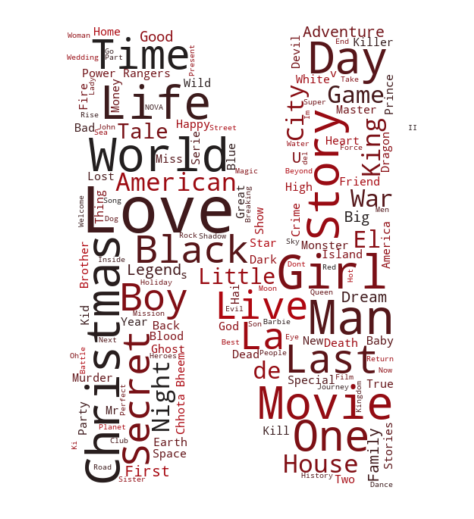

In [189]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = text_title

mask = np.array(Image.open('../Dashboard/Components/data/netflix.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('../Dashboard/Components/data/netflix_title.png')
plt.show()

# NETFLIX CONTENTS ADDED OVER YEARS

In [190]:
netflix_years = netflix[['title', 'type', 'release_year']]
netflix_years.head(2)

,title,type,release_year
0,Dick Johnson Is Dead,Movie,2020
1,Blood & Water,TV Show,2021


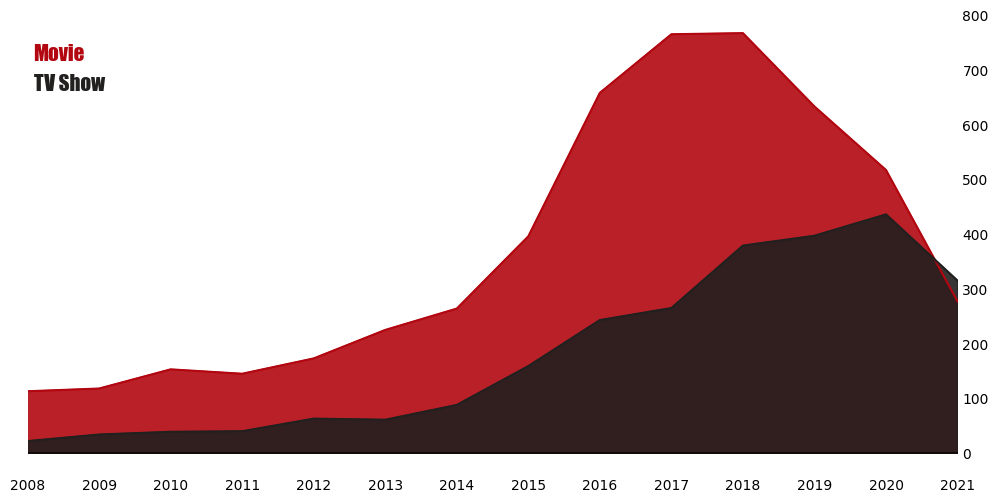

In [191]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]
for i, mtv in enumerate(netflix_years['type'].value_counts().index):
    mtv_rel = netflix_years[netflix_years['type']==mtv]['release_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2022, 1))

fig.text(0.13,0.8,"Movie", fontweight="bold", fontfamily='Impact', fontsize=15, color='#b20710')
fig.text(0.13,0.75,"TV Show", fontweight="bold", fontfamily='Impact', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('../Dashboard/Components/data/netflix_content_added_over_years.png')
plt.show()

# NETFLIX TARGET

In [192]:
netflix_target = netflix[['title', 'rating', 'country']]
netflix_target.head(2)

,title,rating,country
0,Dick Johnson Is Dead,PG-13,United States
1,Blood & Water,TV-MA,South Africa


In [193]:
netflix_target['count'] = 1
netflix_target['first_country'] = netflix_target['country'].apply(lambda x: x.split(",")[0])
netflix_target['first_country'].replace('United States', 'USA', inplace=True)
netflix_target['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_target['first_country'].replace('South Korea', 'S. Korea',inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1986687376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['count'] = 1
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1986687376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['first_country'] = netflix_target['country'].apply(lambda x: x.split(",")[0])
C:\Users\marco\AppData\Local\Temp\ipykernel_5276\1986687376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [194]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [195]:
netflix_target['target_ages'] = netflix_target['rating'].replace(ratings_ages)
netflix_target['target_ages'].unique()

C:\Users\marco\AppData\Local\Temp\ipykernel_5276\3093951697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['target_ages'] = netflix_target['rating'].replace(ratings_ages)


array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [196]:
data = netflix_target.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

df_heatmap = netflix_target.loc[netflix_target['first_country'].isin(data)]

C:\Users\marco\AppData\Local\Temp\ipykernel_5276\2523919034.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = netflix_target.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]


In [197]:
df_heatmap = pd.crosstab(df_heatmap['first_country'], df_heatmap['target_ages'],normalize = "index").T

In [198]:
data

0          USA
1        India
2           UK
3       Canada
4        Japan
5       France
6     S. Korea
7        Spain
8       Mexico
9    Australia
Name: first_country, dtype: object

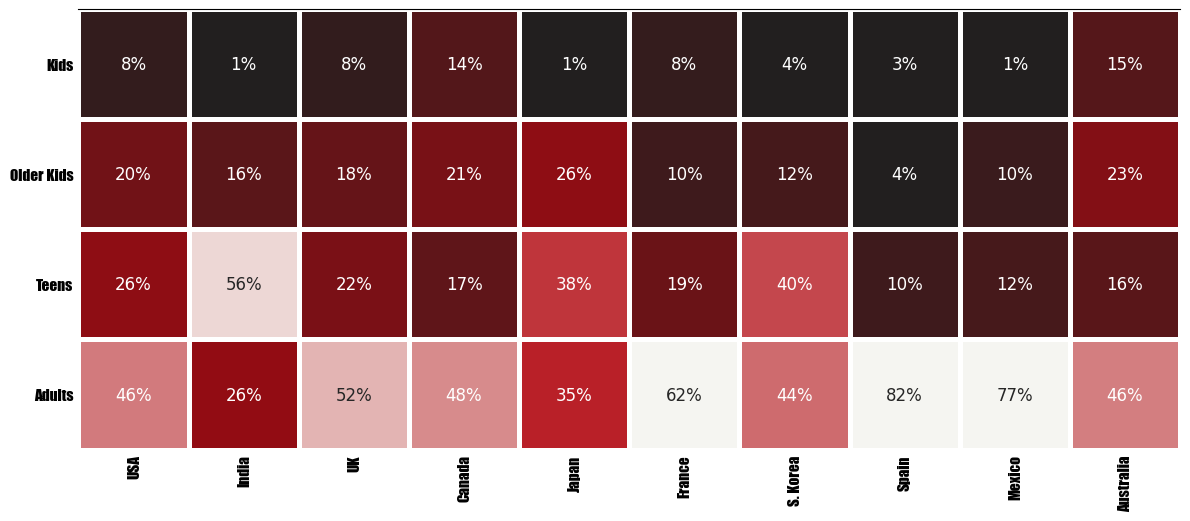

In [199]:
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain', 'Mexico', 'Australia']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='Impact', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='Impact', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

plt.savefig('../Dashboard/Components/data/netflix_country_target.png')
plt.show()